In [1]:
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time
import scipy.io as scio
import math
import h5py
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
plt.rc('font',family='Times New Roman', size=14)

In [2]:
def run(step1, step2, L, W, H, D1, D2):
    steps = random.randint(step1, step2)
    xyz = []
    x0 = random.randint(1, L)
    y0 = random.randint(1, W)
    z0 = random.randint(D1, D2)

    cur1 = [x0, y0, z0]
    cur2 = [x0+1, y0, z0]
    cur3 = [x0, y0+1, z0]
    cur4 = [x0+1, y0+1, z0]
    cur5 = [x0, y0, z0+1]
    cur6 = [x0+1, y0, z0+1]
    cur7 = [x0, y0+1, z0+1]
    cur8 = [x0+1, y0+1, z0+1]
    xyz.extend((cur1, cur2, cur3, cur4, cur5, cur6, cur7, cur8))

    for _ in range(steps):
        axis = random.randint(0, 2)
        stride = random.choice([-2, 2])
        cur1[axis] += stride
        cur2[axis] += stride
        cur3[axis] += stride
        cur4[axis] += stride
        cur5[axis] += stride
        cur6[axis] += stride
        cur7[axis] += stride
        cur8[axis] += stride

        if cur1[0] <= 1:
            cur1[0] = cur3[0] = cur5[0]= cur7[0] = 1
            cur2[0] = cur4[0] = cur6[0]= cur8[0] = 2
        if cur8[0] >= L:
            cur1[0] = cur3[0] = cur5[0]= cur7[0] = L-1
            cur2[0] = cur4[0] = cur6[0]= cur8[0] = L

        if cur1[1] <= 1:
            cur1[1] = cur2[1] = cur5[1]= cur6[1] = 1
            cur3[1] = cur4[1] = cur7[1]= cur8[1] = 2
        if cur8[1] >= W:
            cur1[1] = cur2[1] = cur5[1]= cur6[1] = W-1
            cur3[1] = cur4[1] = cur7[1]= cur8[1] = W

        if cur1[2] <= D1:
            cur1[2] = cur2[2] = cur3[2]= cur4[2] = D1
            cur5[2] = cur6[2] = cur7[2]= cur8[2] = D1+1
        if cur8[2] >= D2:
            cur1[2] = cur2[2] = cur3[2]= cur4[2] = D2-1
            cur5[2] = cur6[2] = cur7[2]= cur8[2] = D2

        xyz.extend((cur1[:], cur2[:], cur3[:], cur4[:], cur5[:], cur6[:], cur7[:], cur8[:]))
    return xyz

def random_walk(path, n, step1, step2, L, W, H, D1, D2):
    if n == 1:
        model1 = run(step1, step2, L, W, H, D1, D2)
        xyz = model1
    if n == 2:
        step1 = step1/2
        step2 = step2/2
        model1 = run(step1, step2, L, W, H, D1, D2)
        model2 = run(step1, step2, L, W, H, D1, D2)
        xyz = model1 + model2
    
    for i in range(len(xyz)):
        xyz[i].append(1) 
    np.savetxt(path, xyz, fmt="%d", delimiter='\t')

22,000 relatively regular and diversified 3D density models. The subsurface was evenly divided into 16 × 32 × 32 = 16,384 cubes

In [3]:
L = 32
W = 32
H = 16
D1 = 1
D2 = 16
step1 = 60
step2 = 80
number = 22000
syn_number = 100
path = r"./model/tra&val/"

In [4]:
start = time.time()
for i in range(0, number):
    model_path = path+ 'model{}.dat'.format(i)
    n = random.randint(1, 2)
    random_walk(model_path, n, step1, step2, L, W, H, D1, D2)
end = time.time()
times = end - start
print('Cost times : %d s' %times)

In [5]:
def save_regular_models(model, path):
    m2 = []
    a = []
    for i, j in enumerate(model):
        for m, n in enumerate(j):
            for p, q in enumerate(n):
                if q == True:
                    a.extend([i, m, p])
                    m2.extend([a]) 
                    a = []
    for i in range(len(m2)):
            m2[i].append(1) 
    np.savetxt(path, m2, fmt="%d", delimiter='\t')

Type Ⅰ: rectangular prism

In [6]:
def run1(path):
    L, W, H = np.indices((32, 32, 16))
    lower0 = np.random.randint(3, 23)
    lower1 = np.random.randint(3, 25)
    upper0 = lower0 + 8
    upper1 = lower1 + 6
    h0 = np.random.randint(1, 9)
    h1 = h0 + 8
    model = (L < upper0) & (L >= lower0) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
    save_regular_models(model, path)

Type Ⅱ: dipping dike model

In [7]:
def run2(path):
    L, W, H = np.indices((32, 32, 16))
    step = random.choice([-4, 4])
    if step == 4:
        lower = np.random.randint(3, 11)
    else:
        lower = np.random.randint(15, 23)
    upper = lower + 8
    lower1 = np.random.randint(3, 25)
    upper1 = lower1 + 6
    h0 = np.random.randint(1, 9)
    deep = 2
    h1  = h0 + deep
    axis = random.choice([-1, 1])
    
    if axis == 1: 
        model = (L < upper) & (L >= lower) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
        model1 = (L < upper + step) & (L >= lower + step) & (W < upper1) & (W >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (L < upper + 2*step) & (L >= lower + 2*step) & (W < upper1) & (W >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        model3 = (L < upper + 3*step) & (L >= lower + 3*step) & (W < upper1) & (W >= lower1) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model = model | model1 | model2 | model3
        
    if axis == -1:
        model = (L < upper1) & (L >= lower1) & (W < upper) & (W >= lower) & (H < h1) & (H >= h0)
        model1 = (L < upper1) & (L >= lower1) & (W < upper + step) & (W >= lower + step) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (L < upper1) & (L >= lower1) & (W < upper + 2*step) & (W >= lower + 2*step) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        model3 = (L < upper1) & (L >= lower1) & (W < upper + 3*step) & (W >= lower + 3*step) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model = model | model1 | model2 | model3
    save_regular_models(model, path)

Type Ⅲ: vertically separated prism

In [8]:
def run3(path):
    L, W, H = np.indices((32, 32, 16))
    lower0 = np.random.randint(3, 23)
    lower1 = np.random.randint(3, 25)
    upper0 = lower0 + 8
    upper1 = lower1 + 6
    h0 = np.random.randint(1, 5)
    deep = 4
    h1 = h0 + deep
    step = 4
    model = (L < upper0) & (L >= lower0) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
    model1 = (L < upper0) & (L >= lower0) & (W < upper1) & (W >= lower1) & (H < h1 + step + deep) & (H >= h1 + step)
    model = model | model1
    save_regular_models(model, path)

Type Ⅳ: syncline prism

In [9]:
def run4(path):
    L, W, H = np.indices((32, 32, 16))
    lower = np.random.randint(3, 11)
    lenth = 4
    step = lenth/2
    upper = lower + lenth
    step2 = 2*lenth
    h0 = np.random.randint(1, 5)
    deep = 2
    h1  = h0 + deep
    lower1 = np.random.randint(3, 25)
    lenth1 = 6
    upper1 = lower1 + lenth1

    axis = random.choice([-1, 1])
    if axis == 1: 
        model = (L < upper) & (L >= lower) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
        model1 = (L < upper + step) & (L >= lower + step) & (W < upper1) & (W >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (L < upper + 2*step) & (L >= lower + 2*step) & (W < upper1) & (W >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        
        model3 = (L < upper + 2*step + step2) & (L >= lower + 2*step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        model4 = (L < upper + step + step2) & (L >= lower + step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model5 = (L < upper + step2) & (L >= lower + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 4*deep) & (H >= h0 + 4*deep)
        model6 = (L < upper - step + step2) & (L >= lower - step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 5*deep) & (H >= h0 + 5*deep)
        
        model7 = (L < upper + 3*step + step2) & (L >= lower + 3*step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model8 = (L < upper + 4*step + step2) & (L >= lower + 4*step + step2) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
        model = model | model1 | model2 | model3 | model4 | model5 | model6 | model7 | model8
        
    if axis == -1:
        model = (W < upper) & (W >= lower) & (L < upper1) & (L >= lower1) & (H < h1) & (H >= h0)
        model1 = (W < upper + step) & (W >= lower + step) & (L < upper1) & (L >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (W < upper + 2*step) & (W >= lower + 2*step) & (L < upper1) & (L >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        
        model3 = (W < upper + 2*step + step2) & (W >= lower + 2*step + step2) & (L < upper1) & (L >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        model4 = (W < upper + step + step2) & (W >= lower + step + step2) & (L < upper1) & (L >= lower1) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model5 = (W < upper + step2) & (W >= lower + step2) & (L < upper1) & (L >= lower1) & (H < h1 + 4*deep) & (H >= h0 + 4*deep)
        model6 = (W < upper - step + step2) & (W >= lower - step + step2) & (L < upper1) & (L >= lower1) & (H < h1 + 5*deep) & (H >= h0 + 5*deep)
    
        model7 = (W < upper + 3*step + step2) & (W >= lower + 3*step + step2) & (L < upper1) & (L >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model8 = (W < upper + 4*step + step2) & (W >= lower + 4*step + step2) & (L < upper1) & (L >= lower1) & (H < h1) & (H >= h0)
        model = model | model1 | model2 | model3 | model4 | model5 | model6 | model7 | model8

    save_regular_models(model, path)

Type Ⅴ: parallel vertical prisms model

In [10]:
def run5(path):
    L, W, H = np.indices((32, 32, 16))
    lower = np.random.randint(3, 17)
    lenth = 4
    upper = lower + lenth
    h0 = np.random.randint(1, 9)
    deep =  6
    h1  = h0 + deep
    step = 2
    step2 = 2.5*lenth
    lower1 = np.random.randint(3, 23)
    lenth1 = 8
    upper1 = lower1 + lenth1

    axis = random.choice([-1, 1])
    if axis == 1: 
        model = (L < upper) & (L >= lower) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
        
        model1 = (L < upper + step2) & (L >= lower + step2) & (W < upper1) & (W >= lower1) & (H < h1 + step) & (H >= h0 + step)
        model = model | model1
        
    if axis == -1:
        model = (L < upper1) & (L >= lower1) & (W < upper) & (W >= lower) & (H < h1) & (H >= h0)
        
        model1 = (L < upper1) & (L >= lower1) & (W < upper + step2) & (W >= lower + step2) & (H < h1 + step) & (H >= h0 + step)
        model = model | model1
    save_regular_models(model, path)

Type Ⅵ: faulted prism

In [11]:
def run6(path):
    L, W, H = np.indices((32, 32, 16))

    lower = np.random.randint(3, 9)
    lenth = 4
    upper = lower + lenth
    
    h0 = np.random.randint(1, 5)
    deep =  2
    h1  = h0 + deep

    step = lenth/2
    step2 = 2.5*lenth
    
    lower1 = np.random.randint(3, 23)
    lenth1 = 8
    upper1 = lower1 + lenth1

    axis = random.choice([-1, 1])
    if axis == 1: 
        model = (L < upper) & (L >= lower) & (W < upper1) & (W >= lower1) & (H < h1) & (H >= h0)
        model1 = (L < upper + step) & (L >= lower + step) & (W < upper1) & (W >= lower1) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (L < upper + 2*step) & (L >= lower + 2*step) & (W < upper1) & (W >= lower1) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)

        model4 = (L < upper + 2*step + step2) & (L >= lower + 2*step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model5 = (L < upper + 3*step + step2) & (L >= lower + 3*step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 4*deep) & (H >= h0 + 4*deep)
        model6 = (L < upper + 4*step + step2) & (L >= lower + 4*step + step2) & (W < upper1) & (W >= lower1) & (H < h1 + 5*deep) & (H >= h0 + 5*deep)
        
        model = model | model1 | model2 | model4 | model5 | model6
        
    if axis == -1:
        model = (L < upper1) & (L >= lower1) & (W < upper) & (W >= lower) & (H < h1) & (H >= h0)
        model1 = (L < upper1) & (L >= lower1) & (W < upper + step) & (W >= lower + step) & (H < h1 + deep) & (H >= h0 + deep)
        model2 = (L < upper1) & (L >= lower1) & (W < upper + 2*step) & (W >= lower + 2*step) & (H < h1 + 2*deep) & (H >= h0 + 2*deep)
        
        model4 = (L < upper1) & (L >= lower1) & (W < upper + 2*step + step2) & (W >= lower + 2*step + step2) & (H < h1 + 3*deep) & (H >= h0 + 3*deep)
        model5 = (L < upper1) & (L >= lower1) & (W < upper + 3*step + step2) & (W >= lower + 3*step + step2) & (H < h1 + 4*deep) & (H >= h0 + 4*deep)
        model6 = (L < upper1) & (L >= lower1) & (W < upper + 4*step + step2) & (W >= lower + 4*step + step2) & (H < h1 + 5*deep) & (H >= h0 + 5*deep)
        model = model | model1 | model2 | model4 | model5 | model6
        
    save_regular_models(model, path)

In the validation experiment, there were a total of 2,000 random models and 600 regular models

In [12]:
for i in range(syn_number):
    path = r'./model/syn/model{}.dat'
    run1(path.format(i))
    run2(path.format(i + syn_number))
    run3(path.format(i + 2*syn_number))
    run4(path.format(i + 3*syn_number))
    run5(path.format(i + 4*syn_number))
    run6(path.format(i + 5*syn_number))

One of these generated models is shown below

<IPython.core.display.Javascript object>


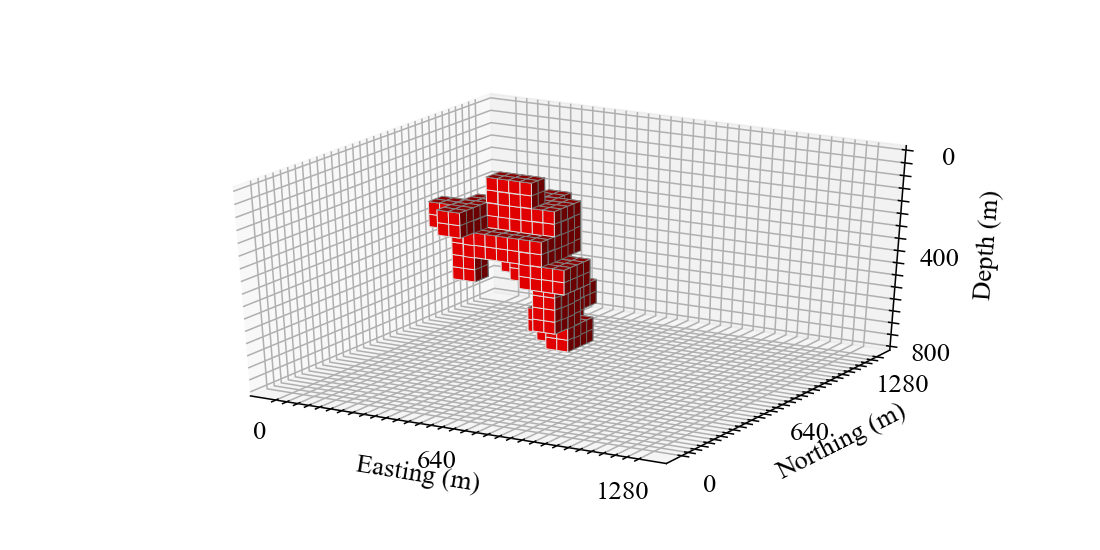

In [13]:
path = r'./model/tra&val/model{}.dat'.format(200)
data = pd.read_table(path, sep = '\t', header=None, engine='python')
model = np.zeros((32, 32, 16))
for i in range(len(data)):
    index = data.iloc[i]
    x = index[0] - 1
    y = index[1] - 1
    z = index[2] - 1
    model[x][y][z] = index[3]
    
model = model > 0
fig = plt.figure(figsize = (8, 4))
ax = fig.gca(projection='3d')
ax.voxels(model, facecolors='r', edgecolors='w', linewidth=0.5)
plt.xticks(np.arange(0, 33, 1), ('0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '640', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '1280'))
ax.set_xlabel('Easting (m)')
plt.yticks(np.arange(0, 33, 1), ('0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '640', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '1280'))
ax.set_ylabel('Northing (m)')
ax.set_zticks(np.arange(0, 17, 1))
ax.set_zticklabels(['0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '400', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '800'])
ax.set_zlabel('Depth (m)')
ax.invert_zaxis()
plt.show()